<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 HW9 </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due April 18, 2025 </b> </font></h1>
    
</div>
</center>

<br>



<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Spring 2025
</font>
</center>








## Your Name: Meg Bucich

## Your ID: 131787276

## 1. Summary

(1) We were given an ODE with variable values and an initial condition. We had to find its numercial solution and its analytically solution. Then we made a plot comparing the two by plotting the differences between them. Then we were given a growth rate equation to implement and plot. We also plotted the numerical solution for two different values of $\Delta t $ to see the impacts of grid space. 
(2) In number two we were asked to take the the two given ODEs and solve for different variables within them.
(3) We were given an interative equation with intial conditions and were asked to plot it for values between 0 and 20. We then had to do a little bit a heavy lifting to get the discretized version so we could plot both of them and their differences. 
(4) We had to solve an existing homework question using a 3rd method, automatic differentiation. 
(5) We were asked to discuss the difference between a residual layer and euler's method.

## 2. Methodology

(1) To find the numerical solution, I applied eulers method and used to loop to obtain my values within the time frame since its a recurisve formula. To get my analytical solution, I already knew what it was because I have used this ODE so many times so I directly applied it to my t values. To find their differences I just created a loop through my t values that would subtract numerical from analytical (or vise versa) since I already had those defined. I used basic matplotlib commands to make all the figures necessary.
(2) I just did a series of algebraic steps to isolate for the variables I needed and plugged them in where necessary.
(3) To get my first graph I had to loop through my t values since it was a recursive formula. Then I used a markdown cell to find the closed/discretized version of it and plotted it. I then plotted both plots and their differences to see they were almost identical, which is expected.
(4) To solve this problem using automatric differenation, we had to use PyTorch. We had to define all of our variables as PyTorch tensors. I then used loss.backward() to compure the gradiant of all varibales then used w1.grad.item() to extract the specific partial We were looking for.
(5) No method needed.

## 3. Code and Results (e.g., Tables, Figures, Outputs)

## Results for Question 1

Use the Euler method to solve the given equation: $$\frac{dy}{dt} = \sigma y$$ with $\sigma = 0.2$ $Y(0) = 0.01$ and $t \in [0,10] $

### (a) Calculate the numerical solutions with $\Delta t = 0.001$ and generate a t-y plot. Include the analytical solution for verification

Euler: $y_{n+1} = y_{n} + \Delta t f(t_{n},y_{n})$ where $f(t,y) = \sigma y$

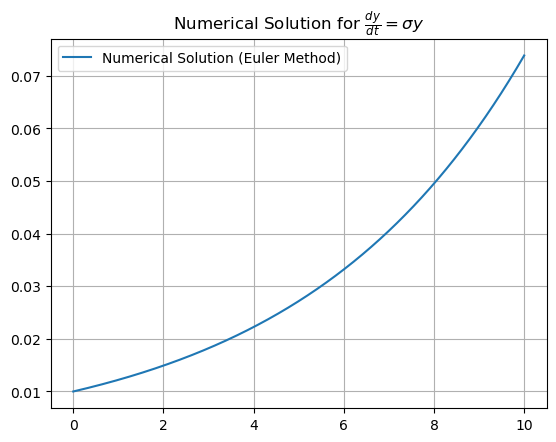

In [84]:
#numerical using eulers 
import numpy as np
import matplotlib.pyplot as plt
dt = 0.001
y_0 = 0.01
o = 0.2
t = np.arange(0+dt,10+dt,dt)
y_euler = np.zeros(len(t))
y_euler[0] = y_0
for i in range(1,len(t)):
    y_euler[i] = y_euler[i-1] + dt * o * y_euler[i-1]
plt.plot(t,y_euler,label = "Numerical Solution (Euler Method)")
plt.title(r"Numerical Solution for $\frac{dy}{dt} = \sigma y$")
plt.grid()
plt.legend(loc="best")
plt.show()


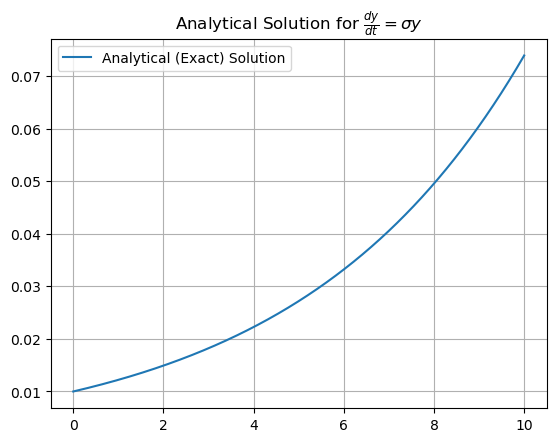

In [145]:
#analyical
dt = 0.001
y_0 = 0.01
o = 0.2
t = np.arange(0+dt,10+dt,dt)
y_exact = y_0*np.exp(o*t)
plt.plot(t,y_exact,label = 'Analytical (Exact) Solution')
plt.grid()
plt.legend(loc = 'best')
plt.title(r'Analytical Solution for $\frac{dy}{dt} = \sigma y$')
plt.show()

### (b) Compute the differences between the numerical solution and analytical solution and generate a plot showing the differences

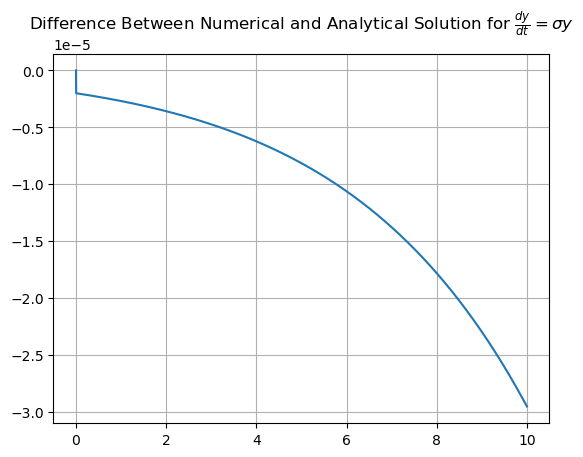

In [96]:
diff = np.zeros(len(t))
for i in range(1,len(t)):
    diff[i] = y_euler[i] - y_exact[i]
plt.plot(t,diff)
plt.title(r"Difference Between Numerical and Analytical Solution for $\frac{dy}{dt} = \sigma y$")
plt.grid()
plt.show()

### (c) Examine the impact of grid space $\Delta t$ on numerical solutions by selection $\Delta t = 0.1$

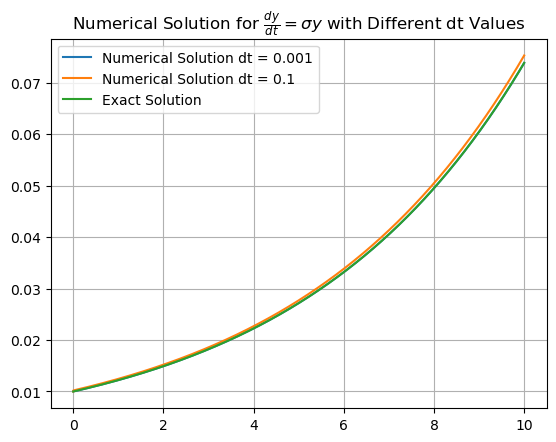

In [100]:
dt1 = 0.001
dt2 = 0.1
y_0 = 0.01
o = 0.2
t = np.arange(0+dt,10+dt,dt)
y_euler_1 = np.zeros(len(t))
y_euler_2 = np.zeros(len(t))
y_euler_1[0] = y_0
y_euler_2[0] = y_0
for i in range(1,len(t)):
    y_euler_1[i] = y_euler[i-1] + dt1 * o * y_euler[i-1]
    y_euler_2[i] = y_euler[i-1] + dt2 * o * y_euler[i-1]

plt.plot(t,y_euler_1,label = "Numerical Solution dt = 0.001")
plt.plot(t,y_euler_2,label = "Numerical Solution dt = 0.1")
plt.plot(t,y_exact, label = "Exact Solution")
plt.title(r"Numerical Solution for $\frac{dy}{dt} = \sigma y$ with Different dt Values")
plt.grid()
plt.legend(loc="best")
plt.show()

### (d) Utilize the numerical solutions in (a) to compute the growth rates using the following expression: $$\frac{1}{\Delta t} \frac{y_{n+1}-y_{n}}{y_{n}}$$

Text(0.5, 1.0, 'Growth rate for $\\frac{dy}{dt} = \\sigma y$')

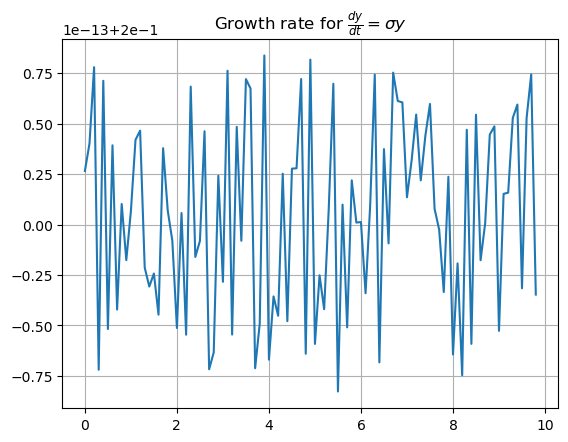

In [118]:
dt = 0.001
y_0 = 0.01
o = 0.2
t = np.arange(0,10,.1) #had to make dt smaller or else it looked crazy (good or bad? dont know).
y_euler = np.zeros(len(t))
y_euler[0] = y_0
for i in range(1,len(t)):
    y_euler[i] = y_euler[i-1] + dt * o * y_euler[i-1]
growth_rate = []
for i in range(len(t)-1):
    growth_rate.append(1/dt * ((y_euler[i+1] - y_euler[i])/y_euler[i]))
t = t[:-1]
plt.plot(t,growth_rate)
plt.grid()
plt.title(r"Growth rate for $\frac{dy}{dt} = \sigma y$")

## Results for Question 2

### Look at reference 31 in the wikipedia page to complete this problem

Eq. 1 Simpliest ODE: $$\frac{dZ}{dt} = \sigma Z$$
Eq. 2 Logistic ODE: $$\frac{dX}{dt} = \sigma X(1-X)$$

### (a) Implement the centered difference scheme on Eq (1) to derive the Fibonacci Sequence given by $Z_{n+1} = Z_{n-1}+Z_{n}$. Determine $\Delta t$ in relation to $\sigma$

$$
\frac{dZ}{dt} \approx \frac{Z_{n+1} - Z_{n-1}}{2\Delta t}
$$

Substituting into the ODE:

$$
\frac{Z_{n+1} - Z_{n-1}}{2\Delta t} = \sigma Z_n
$$


Multiply both sides by $2\Delta t$:

$$
Z_{n+1} - Z_{n-1} = 2\Delta t \cdot \sigma Z_n
$$

Add $Z_{n-1}$ to both sides:

$$
Z_{n+1} = 2\Delta t \cdot \sigma Z_n + Z_{n-1}
$$



The Fibonacci recurrence is:

$$
Z_{n+1} = Z_n + Z_{n-1}
$$

To match both expressions:

$$
2\Delta t \cdot \sigma Z_n + Z_{n-1} = Z_n + Z_{n-1}
$$

Subtract $Z_{n-1}$ from both sides:

$$
2\Delta t \cdot \sigma Z_n = Z_n
$$

Divide both sides by $ Z_n $ (assuming $ Z_n \neq 0 $):

$$
2\Delta t \cdot \sigma = 1
\quad \Rightarrow \quad
\boxed{\Delta t = \frac{1}{2\sigma}}
$$


By choosing 

$$
\Delta t = \frac{1}{2\sigma}
$$

the centered difference scheme applied to the ODE in (1) leads to the Fibonacci recurrence:

$$
Z_{n+1} = Z_n + Z_{n-1}
$$


### (b) Use the forward difference scheme to discretize Eq. (2), recognized as the logistic map: $Y_{n+1} = \rho Y_{n}(1-Y_{n})$. Find $\rho$ as a function of $\sigma$ and $\Delta t$ and express $X_{n}$ in terms of $\sigma, \Delta t, Y_{n}$


$$
\frac{dX}{dt} = \sigma X(1 - X) \tag{2}
$$

$$
\frac{dX}{dt} \approx \frac{X_{n+1} - X_n}{\Delta t}
$$

Substituting into Eq. (2):

$$
\frac{X_{n+1} - X_n}{\Delta t} = \sigma X_n (1 - X_n)
$$

Multiply both sides by $\Delta t$:

$$
X_{n+1} - X_n = \sigma \Delta t \cdot X_n (1 - X_n)
$$

Add $X$ to both sides:

$$
X_{n+1} = X_n + \sigma \Delta t \cdot X_n (1 - X_n)
$$


Let $$Y_n = X_n$$
Then we get
$$
Y_{n+1} = \rho Y_n (1 - Y_n)
$$

To match the forms:

$$
Y_n + \sigma \Delta t \cdot Y_n (1 - Y_n) = \rho Y_n (1 - Y_n)
$$

This implies:

$$
Y_n + \sigma \Delta t \cdot Y_n (1 - Y_n) = Y_n \left[1 + \sigma \Delta t (1 - Y_n)\right]
$$

Now let
$$
X_{n+1} = X_n + \sigma \Delta t X_n (1 - X_n)
= X_n \left[1 + \sigma \Delta t (1 - X_n)\right]
$$

$$
Y_{n+1} = \rho Y_n (1 - Y_n)
$$

To force this match, we define:

$$
\rho = 1 + \sigma \Delta t
$$

- Logistic map parameter:

  $$
  \boxed{\rho = 1 + \sigma \Delta t}
  $$

- Forward scheme recurrence in terms of $Y_n$, $\sigma$, and $\Delta t$:

  $$
  \boxed{X_{n+1} = X_n + \sigma \Delta t \cdot X_n (1 - X_n)}
  \quad \text{or} \quad
  \boxed{X_{n+1} = X_n \left[1 + \sigma \Delta t (1 - X_n)\right]}
  $$


## Results for Question 3

 Eq 5: $$ Y_{n+1} = \rho Y_{n}$$
 $$Y_{0} = 0.01$$
 $$\rho = 1.2$$
 $$n = 0,1,...,20$$

### (a) produce a plot for the numerical solution using Eq. 5

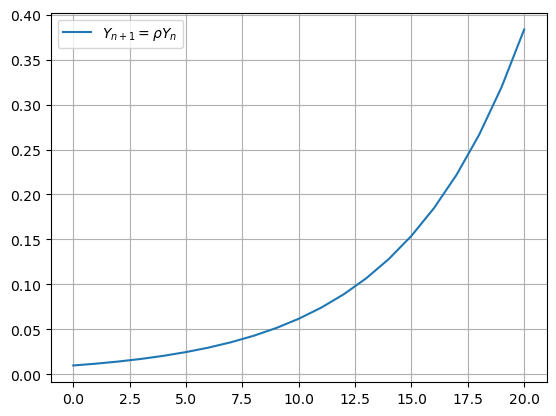

In [125]:
Y_0 = 0.01
p = 1.2
t = np.arange(0,21,1)
Y = np.zeros(len(t))
Y[0] = Y_0
for i in range(1,len(t)):
    Y[i] = p * Y[i-1]
plt.plot(t,Y, label=r'$Y_{n+1} = \rho Y_n$')   
plt.grid()
plt.legend()
plt.show()

### (b) substitute $Y_{n} = (\lambda)^{n}$ into Eq.5 to obtain the solution in terms of  $\rho$. Generate a plot to compare the solutions in (a) and (b)

$$Y_{n} = (\lambda)^{n}$$
then $$Y_{n+1} = (\lambda)^{n+1} = \lambda (\lambda)^{n}$$
we get $$ \lambda (\lambda)^{n} = \rho (\lambda)^{n}$$
assume $\lambda \neq 0$
then we have $$Y_{n} = C\rho^{n}$$
we have that $Y_{0} = 0.01$ so
$$\boxed{Y_{n} = 0.01(\rho)^{n}}$$

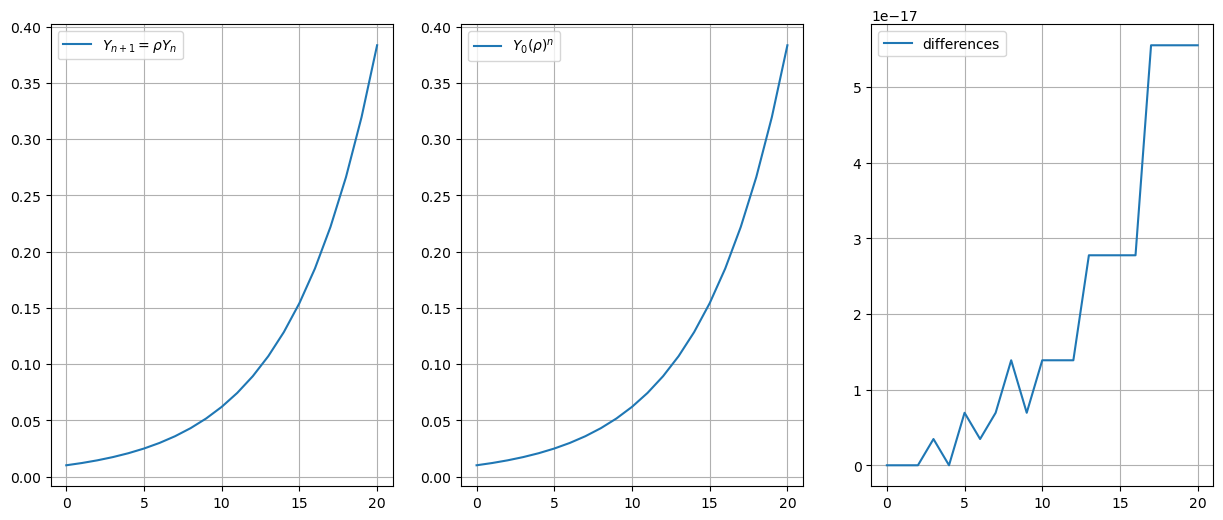

In [162]:
Y_0 = 0.01
p = 1.2
t = np.arange(0,21,1)
Y1 = np.zeros(len(t))
Y1[0] = Y_0
Y2 = Y_0 * (p ** t)
for i in range(1,len(t)):
    Y1[i] = p * Y[i-1]
diff = Y1 - Y2
plt.figure(figsize = (15,6))
plt.subplot(1,3,1)
plt.plot(t,Y1, label=r'$Y_{n+1} = \rho Y_n$') 
plt.grid()
plt.legend()
plt.subplot(1,3,2)
plt.plot(t,Y2, label = r'$Y_{0}(\rho)^{n}$')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(t,diff, label=("differences"))
plt.legend()
plt.grid()
plt.show()

## Results for Question 4

###  Use HW7 #3 and HW8 #4: Use Automatic Differentiation to solve it and compare your results with your findings from HW7 and HW8 for backpropagation 

In [191]:
import torch
u = torch.tensor(0.5)
v = torch.tensor(0.1)
q_target = torch.tensor(1.0)
w1 = torch.tensor(0.3, requires_grad=True)
w2 = torch.tensor(0.4, requires_grad=False)
b1 = torch.tensor(0.1, requires_grad=False)
w3 = torch.tensor(0.7, requires_grad=False)
b2 = torch.tensor(0.2, requires_grad=False)
x = u * w1 + v * w2 + b1
a = x
z = w3 * a + b2
q_hat = z
loss = 0.5 * (q_target - q_hat) ** 2
loss.backward()
print(f"Predicted q: {q_hat.item():.6f}")
print(f"Loss: {loss.item():.6f}")
print(f"Gradient of loss w.r.t w1 (using autograd): {w1.grad.item():.6f}")


Predicted q: 0.403000
Loss: 0.178205
Gradient of loss w.r.t w1 (using autograd): -0.208950


My $\frac{\partial L}{\partial w_{1}}$ is the same as the value i got in HW7 and HW8

### Results for Question 5

### In the transformer architecture shown, residual layers have been incorporated. Please briefly dicuss the concept of the residual layer and its interpretaion form the perspective of the Euler mehtod 

Add & Norm essentially means we are adding the input back in then we normalize the result. This is what the residual layer is doing. This is applying some type of transformation to the input then adding the original input back in because we still need it. This relates to euler's method because we need data from the past as it is based on recurison. We can express the residual layer as $x_{new} = x + Layer(x)$ where we also have euler's method of $X_{n+1} = X_{n} + \Delta Tf(X_{n})$. Its the same process.